In [5]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [6]:
# load dataset after exporting the "all_data" table from MySQL
df = pd.read_csv('all_data.csv', sep = '|')

In [7]:
df.head()

,ID,project_name,subcategory_name,category_name,country,currency,launch_date,deadline_date,duration_days,goal,money_raised,no_of_backers,outcome
0,1,Ragdolls,Webseries,Film & Video,US,USD,2013-04-25 00:00:00,2013-05-25 00:00:00,30,15000.00,20.00,3,failed
1,2,One To Ten,Shorts,Film & Video,GB,GBP,2015-11-16 00:00:00,2015-12-16 00:00:00,30,223.68,413.81,23,successful
2,3,Future Gun - A short film about kids and advan...,Animation,Film & Video,US,USD,2013-08-28 00:00:00,2013-09-27 00:00:00,30,5000.00,1497.00,28,failed
3,4,Fourth Wave Apparel—Vintage Fashion for the Mo...,Apparel,Fashion,US,USD,2014-07-22 00:00:00,2014-08-21 00:00:00,30,6000.00,8795.00,218,successful
4,5,The Rich Lifestyle,Documentary,Film & Video,US,USD,2016-08-24 00:00:00,2016-09-28 00:00:00,35,2000000.00,2.00,2,failed


In [8]:
df.shape

(15000, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                15000 non-null  int64  
 1   project_name      15000 non-null  object 
 2   subcategory_name  15000 non-null  object 
 3   category_name     15000 non-null  object 
 4   country           15000 non-null  object 
 5   currency          15000 non-null  object 
 6   launch_date       15000 non-null  object 
 7   deadline_date     15000 non-null  object 
 8   duration_days     15000 non-null  int64  
 9   goal              15000 non-null  float64
 10  money_raised      15000 non-null  float64
 11  no_of_backers     15000 non-null  int64  
 12  outcome           15000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.5+ MB


In [10]:
df.describe()

,ID,duration_days,goal,money_raised,no_of_backers
count,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,7500.500000,34.307067,7.236114e+04,8.941511e+03,111.779200
std,4330.271354,12.945824,2.014646e+06,7.864634e+04,1139.530531
min,1.000000,1.000000,7.500000e-01,0.000000e+00,0.000000
25%,3750.750000,30.000000,2.000000e+03,3.000000e+01,2.000000
50%,7500.500000,30.000000,5.245655e+03,6.502250e+02,12.000000
75%,11250.250000,37.000000,1.532502e+04,4.171932e+03,56.000000
max,15000.000000,92.000000,1.000000e+08,5.408917e+06,105857.000000


<AxesSubplot:xlabel='duration_days', ylabel='Count'>

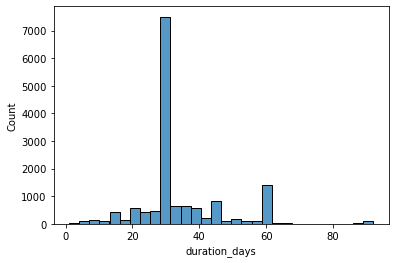

In [11]:
sns.histplot(x='duration_days', data=df, bins=30)

<AxesSubplot:xlabel='money_raised', ylabel='category_name'>

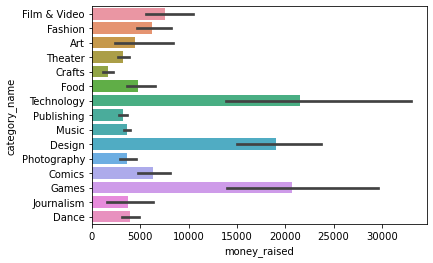

In [12]:
sns.barplot(y='category_name', x='money_raised', data=df)

[Text(0.5, 1.0, 'Amount Raised by Top 10 Subcategories of Total Campaigns'),
 Text(0.5, 0, 'Amount Raised per Campaign (in USD)'),
 Text(0, 0.5, 'Game Subcategories')]

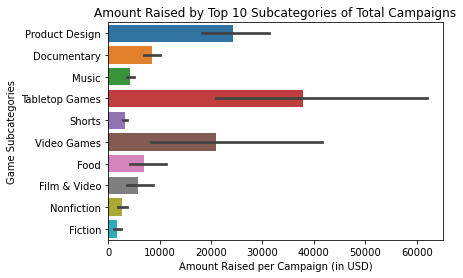

In [13]:
sns.barplot(y='subcategory_name', x='money_raised', data=df.loc[df['currency'] == 'USD'],
            order=df['subcategory_name'].value_counts().iloc[:10].index
           ).set(title='Amount Raised by Top 10 Subcategories of Total Campaigns',
                 xlabel='Amount Raised per Campaign (in USD)', ylabel='Game Subcategories')

<AxesSubplot:xlabel='Count', ylabel='subcategory_name'>

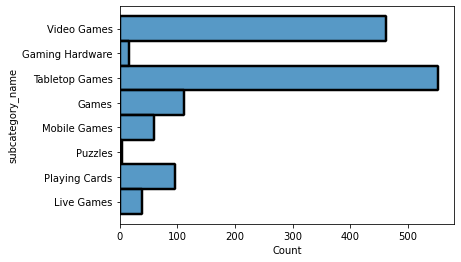

In [14]:
sns.histplot(y='subcategory_name', data=df.loc[df['category_name'] == 'Games'])

In [15]:
df.loc[(df['subcategory_name'] == 'Tabletop Games')].describe()

,ID,duration_days,goal,money_raised,no_of_backers
count,553.000000,553.000000,553.000000,5.530000e+02,553.000000
mean,7105.788427,31.301989,14321.153128,3.404647e+04,446.871609
std,4288.987270,10.103143,23669.214476,2.019518e+05,1991.836356
min,43.000000,5.000000,10.000000,0.000000e+00,0.000000
25%,3331.000000,30.000000,2929.500000,9.850000e+02,23.000000
50%,6828.000000,30.000000,7143.570000,5.209000e+03,91.000000
75%,10718.000000,33.000000,15800.000000,1.541510e+04,283.000000
max,14972.000000,90.000000,250000.000000,3.999796e+06,40642.000000


In [16]:
df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['outcome'] == 'successful')].describe()

,ID,duration_days,goal,money_raised,no_of_backers
count,294.000000,294.000000,294.000000,2.940000e+02,294.000000
mean,7315.020408,29.503401,10258.851497,6.093329e+04,785.003401
std,4253.312922,9.434794,19555.084911,2.743197e+05,2687.271815
min,43.000000,5.000000,10.000000,7.400000e+01,8.000000
25%,3710.000000,25.250000,1688.167500,5.622250e+03,90.000000
50%,7026.000000,30.000000,5000.000000,1.185478e+04,221.500000
75%,10849.000000,31.000000,10000.000000,3.054488e+04,605.500000
max,14972.000000,60.000000,250000.000000,3.999796e+06,40642.000000


In [17]:
# sort successful board games by money raised
df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['outcome'] == 'successful')].sort_values(by=['money_raised'], ascending=False)

,ID,project_name,subcategory_name,category_name,country,currency,launch_date,deadline_date,duration_days,goal,money_raised,no_of_backers,outcome
9959,9960,Gloomhaven (Second Printing),Tabletop Games,Games,US,USD,2017-04-04 00:00:00,2017-05-02 00:00:00,28,100000.00,3999795.77,40642,successful
7702,7703,Ghostbusters™: The Board Game,Tabletop Games,Games,US,USD,2015-02-10 00:00:00,2015-03-12 00:00:00,30,250000.00,1546269.50,8396,successful
5071,5072,Shadows of Brimstone,Tabletop Games,Games,US,USD,2013-10-23 00:00:00,2013-11-25 00:00:00,33,30000.00,1341305.03,4727,successful
2620,2621,Dropfleet Commander,Tabletop Games,Games,GB,GBP,2015-10-30 00:00:00,2015-12-04 00:00:00,35,60558.35,952616.12,3918,successful
4378,4379,Robot Turtles: The Board Game for Little Progr...,Tabletop Games,Games,US,USD,2013-09-03 00:00:00,2013-09-28 00:00:00,25,25000.00,631230.58,13765,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,9832,The March of the Warden - A 5e RPG Campaign,Tabletop Games,Games,DE,EUR,2016-09-11 00:00:00,2016-10-11 00:00:00,30,110.02,534.69,33,successful
4773,4774,25mm scale building maps,Tabletop Games,Games,US,USD,2015-11-22 00:00:00,2015-12-07 00:00:00,15,50.00,201.00,9,successful
11379,11380,Paper Adventure: A FUN way for the whole famil...,Tabletop Games,Games,US,USD,2017-11-19 00:00:00,2017-11-28 00:00:00,9,25.00,173.00,40,successful
5853,5854,UK Games Expo 2016 coverage,Tabletop Games,Games,GB,GBP,2016-05-23 00:00:00,2016-05-28 00:00:00,5,72.16,144.32,14,successful


In [22]:
# test whether if goals for dollars raised is significantly different between campaigns that are successful and unsuccessful
group_successful = df.loc[(df['currency'] == 'USD') & (df['outcome'] == 'successful')]
group_unsuccessful = df.loc[(df['currency'] == 'USD') & (df['outcome'] == 'failed')]
print('group:\t', 'successful', '\t', 'failed')
print('size:\t', group_successful['goal'].count(), '\t\t', group_unsuccessful['goal'].count())
print('mean:\t', round(group_successful['goal'].mean(), 2), '\t', round(group_unsuccessful['goal'].mean(), 2))
print('std:\t', round(group_successful['goal'].std(), 2), '\t', round(group_unsuccessful['goal'].std(), 2))
print('variance ratio:', round(group_unsuccessful['goal'].var()/group_successful['goal'].var(), 2))

group:	 successful 	 failed
size:	 4369 		 6080
mean:	 9975.66 	 101653.0
std:	 39145.38 	 2575489.81
variance ratio: 4328.71


In [23]:
st.ttest_ind(group_successful['goal'], group_unsuccessful['goal'], equal_var = False)

Ttest_indResult(statistic=-2.775135250689853, pvalue=0.005534726341721135)

In [27]:
# test whether if longer or shorter campaigns tend to raise more money
subset = df.loc[(df['currency'] == 'USD')].sort_values(by=['duration_days'], ascending=False)
size = len(subset)
group_longer = subset[:size//2]
group_shorter = subset[size//2:size]
print('group:\t', 'longer', '\t', 'shorter')
print('size:\t', group_longer['money_raised'].count(), '\t\t', group_shorter['money_raised'].count())
print('mean:\t', round(group_longer['money_raised'].mean(), 2), '\t', round(group_shorter['money_raised'].mean(), 2))
print('std:\t', round(group_longer['money_raised'].std(), 2), '\t', round(group_shorter['money_raised'].std(), 2))
print('variance ratio:', round(group_longer['money_raised'].var()/group_shorter['money_raised'].var(), 2))

group:	 longer 	 shorter
size:	 5886 		 5886
mean:	 11812.03 	 7464.67
std:	 100751.41 	 68304.33
variance ratio: 2.18


In [26]:
st.ttest_ind(group_longer['money_raised'], group_shorter['money_raised'], equal_var = True)

Ttest_indResult(statistic=2.740094085760683, pvalue=0.006151417242013839)

In [28]:
# test whether if longer or shorter campaigns tend to have more backers
subset = df.loc[(df['currency'] == 'USD')].sort_values(by=['duration_days'], ascending=False)
size = len(subset)
group_longer = subset[:size//2]
group_shorter = subset[size//2:size]
print('group:\t', 'longer', '\t', 'shorter')
print('size:\t', group_longer['no_of_backers'].count(), '\t\t', group_shorter['no_of_backers'].count())
print('mean:\t', round(group_longer['no_of_backers'].mean(), 2), '\t', round(group_shorter['no_of_backers'].mean(), 2))
print('std:\t', round(group_longer['no_of_backers'].std(), 2), '\t', round(group_shorter['no_of_backers'].std(), 2))
print('variance ratio:', round(group_longer['no_of_backers'].var()/group_shorter['no_of_backers'].var(), 2))

group:	 longer 	 shorter
size:	 5886 		 5886
mean:	 145.14 	 98.78
std:	 1641.34 	 735.87
variance ratio: 4.97


In [29]:
st.ttest_ind(group_longer['no_of_backers'], group_shorter['no_of_backers'], equal_var = False)

Ttest_indResult(statistic=1.9772390420832568, pvalue=0.04804822345652115)

In [31]:
# test whether if longer or shorter successful campaigns tend to be raise more money
subset = df.loc[(df['currency'] == 'USD')].sort_values(by=['duration_days'], ascending=False)
size = len(subset)
group_longer = subset[:size//2]
group_shorter = subset[size//2:size]
print('group:\t', 'longer', '\t', 'shorter')
print('size:\t', group_longer.loc[(df['outcome'] == 'successful')]['money_raised'].count(), '\t\t', group_shorter.loc[(df['outcome'] == 'successful')]['money_raised'].count())
print('mean:\t', round(group_longer.loc[(df['outcome'] == 'successful')]['money_raised'].mean(), 2), '\t', round(group_shorter.loc[(df['outcome'] == 'successful')]['money_raised'].mean(), 2))
print('std:\t', round(group_longer.loc[(df['outcome'] == 'successful')]['money_raised'].std(), 2), '\t', round(group_shorter.loc[(df['outcome'] == 'successful')]['money_raised'].std(), 2))
print('variance ratio:', round(group_longer.loc[(df['outcome'] == 'successful')]['money_raised'].var()/group_shorter.loc[(df['outcome'] == 'successful')]['money_raised'].var(), 2))

group:	 longer 	 shorter
size:	 2106 		 2263
mean:	 29233.52 	 17425.0
std:	 166573.59 	 109029.46
variance ratio: 2.33


In [32]:
st.ttest_ind(group_longer.loc[(df['outcome'] == 'successful')]['money_raised'], group_shorter.loc[(df['outcome'] == 'successful')]['money_raised'], equal_var = True)

Ttest_indResult(statistic=2.790630959693033, pvalue=0.005283379403697745)

In [33]:
df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['outcome'] == 'failed') & (df['goal'] == 10000.00)].describe()

,ID,duration_days,goal,money_raised,no_of_backers
count,7.000000,7.000000,7.0,7.000000,7.000000
mean,4154.714286,32.857143,10000.0,519.428571,17.000000
std,4849.892051,5.727960,0.0,435.298310,12.832251
min,961.000000,28.000000,10000.0,89.000000,8.000000
25%,1816.500000,30.000000,10000.0,259.500000,9.000000
50%,2616.000000,30.000000,10000.0,461.000000,11.000000
75%,3476.000000,33.500000,10000.0,582.000000,20.000000
max,14921.000000,45.000000,10000.0,1403.000000,42.000000


In [34]:
df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['outcome'] == 'successful') & (df['goal'] == 10000.00)].describe()

,ID,duration_days,goal,money_raised,no_of_backers
count,20.000000,20.000000,20.0,20.000000,20.000000
mean,7310.950000,27.500000,10000.0,34079.779000,896.750000
std,4033.191064,7.963734,0.0,30588.986503,1203.060915
min,537.000000,7.000000,10000.0,10215.000000,44.000000
25%,5096.500000,28.500000,10000.0,11687.500000,249.000000
50%,6724.000000,30.000000,10000.0,21308.345000,508.500000
75%,9713.250000,30.000000,10000.0,43140.750000,1000.000000
max,14320.000000,41.000000,10000.0,115685.950000,5119.000000


[Text(0.5, 1.0, 'Goals of Board Game Campaigns by Outcomes'),
 Text(0.5, 0, 'Outcomes'),
 Text(0, 0.5, 'Goals (in USD)')]

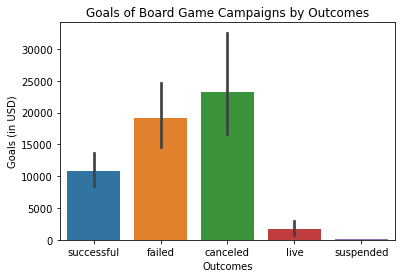

In [35]:
sns.barplot(x='outcome', y='goal',
            data=df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['currency'] == 'USD')]
           ).set(title='Goals of Board Game Campaigns by Outcomes',
                 xlabel='Outcomes', ylabel='Goals (in USD)')

[Text(0.5, 1.0, 'Amount Raised per Board Game Campaign Campaigns by Outcomes'),
 Text(0.5, 0, 'Outcomes'),
 Text(0, 0.5, 'Amount Raised (in USD)')]

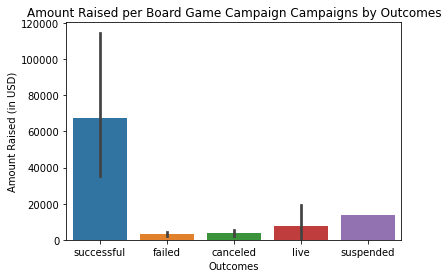

In [36]:
sns.barplot(x='outcome', y='money_raised',
            data=df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['currency'] == 'USD')]
           ).set(title='Amount Raised per Board Game Campaign Campaigns by Outcomes',
                 xlabel='Outcomes', ylabel='Amount Raised (in USD)')

[Text(0.5, 1.0, 'Backers of Board Game Campaigns by Outcomes'),
 Text(0.5, 0, 'Outcomes'),
 Text(0, 0.5, 'Number of backers')]

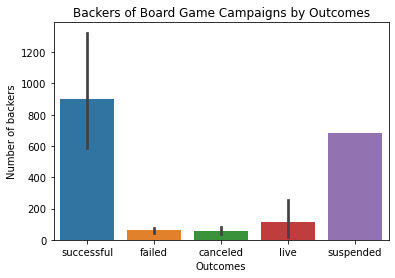

In [37]:
sns.barplot(x='outcome', y='no_of_backers',
            data=df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['currency'] == 'USD')]
           ).set(title='Backers of Board Game Campaigns by Outcomes',
                 xlabel='Outcomes', ylabel='Number of backers')

[Text(0.5, 1.0, 'Average Pledge per Backer of Board Game Campaigns by Outcomes'),
 Text(0.5, 0, 'Outcomes'),
 Text(0, 0.5, 'Average Pledge per Backer (in USD)')]

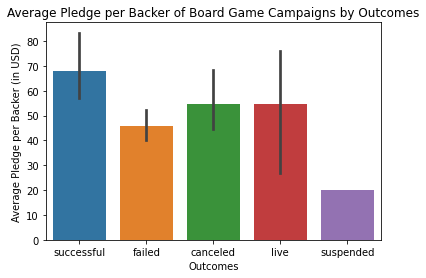

In [38]:
df['avg_pledge_per_backer'] = df['money_raised']/df['no_of_backers']
sns.barplot(x='outcome', y='avg_pledge_per_backer',
            data=df.loc[(df['subcategory_name'] == 'Tabletop Games') & (df['currency'] == 'USD')]
           ).set(title='Average Pledge per Backer of Board Game Campaigns by Outcomes',
                 xlabel='Outcomes', ylabel='Average Pledge per Backer (in USD)')